📘 Suicide Mortality Rate Analysis Using WHO Data
Author: Kimberly Deayon
Goal: Explore global suicide mortality trends over time using WHO data, and build interactive visualizations to communicate insights🗣️ How to Position It in an Interview
You could say something like:
“I built an interactive dashboard that explores global suicide mortality rates using public health data. It includes gender and country-level breakdowns, geographic animations over time, and even custom filtering features. Along the way, I had to debug real-world data issues — like mismatched country names and inconsistent time formats — which gave me a chance to hone my data cleaning and problem-solving skills.”



.




🧩 Step 1: Import Librarieslate key stats and trends.

Ready to move on to Option 1: Gender Dropdown?


In [126]:
import pandas as pd
#for data Wrangling
import plotly.express as px
#for interactive visualizaitons

📂 Step 2: Load the Datasettats and trends.

Ready to move on to Option 1: Gender Dropdown?


In [129]:
# Replace this with your actual file name
df = pd.read_csv("suicide_mortality_rate.csv")

# Show the first few rows
df.head()



,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2013,YEAR,800,COUNTRY,PUBLISHED,Suicide deaths,Uganda,FEMALE,TOTAL,1.7100,0.992,2.7900
1,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2005,YEAR,818,COUNTRY,PUBLISHED,Suicide deaths,Egypt,FEMALE,TOTAL,2.3000,1.220,3.8000
2,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2015,YEAR,818,COUNTRY,PUBLISHED,Suicide deaths,Egypt,TOTAL,TOTAL,3.2800,1.570,6.1300
3,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2003,YEAR,858,COUNTRY,PUBLISHED,Suicide deaths,Uruguay,MALE,TOTAL,24.7415,21.443,28.3491
4,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2003,YEAR,860,COUNTRY,PUBLISHED,Suicide deaths,Uzbekistan,TOTAL,TOTAL,9.0200,7.600,10.5763


This loads the WHO suicide mortality dataset, which includes:
- Country (GEO_NAME_SHORT)
- Year (DIM_TIME)
- Gender (DIM_SEX)
- Age group (DIM_AGE)
- Suicide rate per 100,000 (RATE_PER_100000_N)



🧼 Step 3: Clean the Datads.

Ready to move on to Option 1: Gender Dropdown?



In [133]:
# Drop rows with missing suicide rate
df = df.dropna(subset=["RATE_PER_100000_N"])

# Convert year to numeric
df["DIM_TIME"] = pd.to_numeric(df["DIM_TIME"], errors="coerce")

# Filter to total gender and total age
countries = ["United States of America", "India", "Brazil", "Japan", "South Africa", "Russian Federation"]

df_filtered = df[
    (df["DIM_SEX"] == "TOTAL") &
    (df["DIM_AGE"] == "TOTAL") &
    (df["GEO_NAME_SHORT"].isin(countries))
].copy()



# Sort by country and year to ensure correct line plotting
df_filtered = df_filtered.sort_values(by=["GEO_NAME_SHORT", "DIM_TIME"])



This ensures we’re only plotting one line per country, with clean and consistent time series data.

📊 Step 4: Create the Interactive Line Chartve on to Option 1: Gender Dropdown?


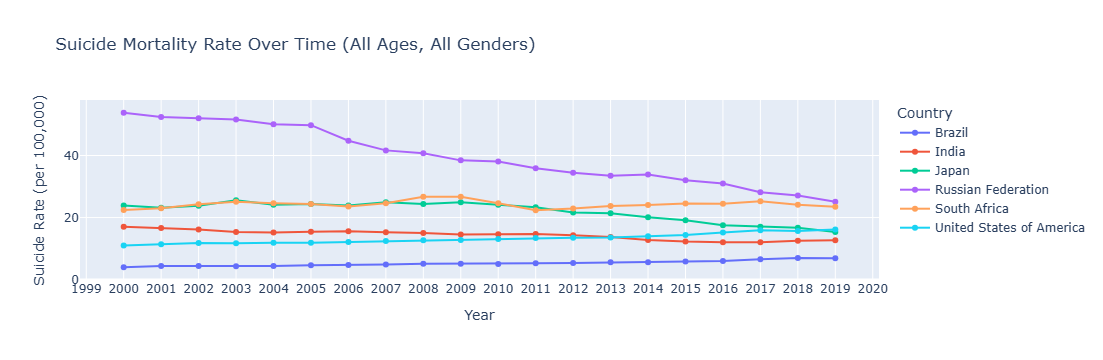

In [137]:

fig = px.line(
    df_filtered,
    x="DIM_TIME",
    y="RATE_PER_100000_N",
    color="GEO_NAME_SHORT",
    markers=True,
    title="Suicide Mortality Rate Over Time (All Ages, All Genders)",
    labels={
        "DIM_TIME": "Year",
        "RATE_PER_100000_N": "Suicide Rate (per 100,000)",
        "GEO_NAME_SHORT": "Country"
    }
)

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=2000, dtick=1)
)

fig.show()



This interactive line chart shows suicide mortality trends over time for selected countries. Hovering reveals exact values, and the chart is zoomable and pannable.

What can we do next?

## Option 1: Gender Dropdown
This section adds an interactive dropdown to explore suicide mortality trends by gender. Users can toggle between "MALE", "FEMALE", and "TOTAL" to compare how suicide rates differ across genders over time



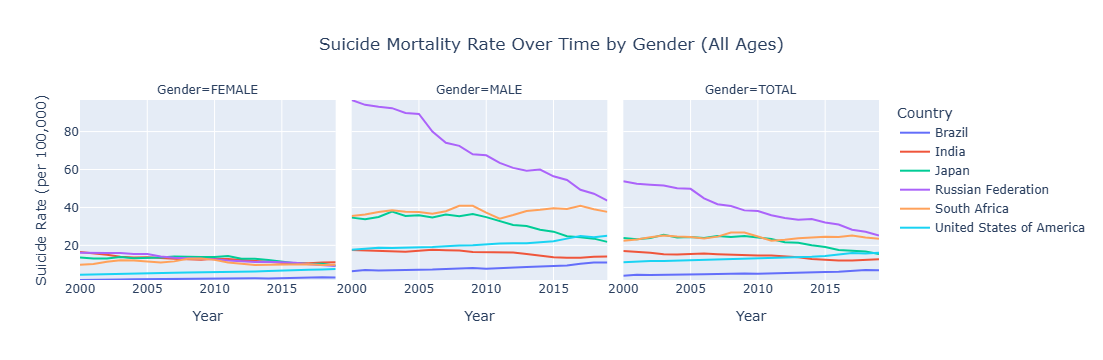

In [141]:
# Step 1: Filter to selected countries and total age group
countries = ["United States of America", "India", "Brazil", "Japan", "South Africa", "Russian Federation"]
df_gender = df[
    (df["DIM_AGE"] == "TOTAL") &
    (df["GEO_NAME_SHORT"].isin(countries))
].copy()

# Step 2: Ensure gender order is consistent
df_gender["DIM_SEX"] = pd.Categorical(
    df_gender["DIM_SEX"],
    categories=["FEMALE", "MALE", "TOTAL"],
    ordered=True
)

# Step 3: Sort for proper line plotting
df_gender = df_gender.sort_values(by=["GEO_NAME_SHORT", "DIM_SEX", "DIM_TIME"])

# Step 4: Calculate global y-axis range
y_min = df_gender["RATE_PER_100000_N"].min()
y_max = df_gender["RATE_PER_100000_N"].max()

# Step 5: Create the faceted line chart
fig = px.line(
    df_gender,
    x="DIM_TIME",
    y="RATE_PER_100000_N",
    color="GEO_NAME_SHORT",
    line_group="GEO_NAME_SHORT",
    facet_col="DIM_SEX",
    title="Suicide Mortality Rate Over Time by Gender (All Ages)",
    labels={
        "DIM_TIME": "Year",
        "RATE_PER_100000_N": "Suicide Rate (per 100,000)",
        "GEO_NAME_SHORT": "Country",
        "DIM_SEX": "Gender"
    }
)

# Step 6: Apply consistent x-axis ticks and y-axis range
fig.update_layout(
    legend_title="Country",
    title_x=0.5
)

# Set x-axis ticks every 5 years for all subplots
fig.update_xaxes(
    tickmode='linear',
    tick0=2000,
    dtick=5,
    title='Year'
)

# Set consistent y-axis range for all subplots
for axis in ['yaxis', 'yaxis2', 'yaxis3']:
    fig.layout[axis].update(range=[y_min, y_max])

# Step 7: Show the plot
fig.show()



## Option 2: Choropleth Map
This section visualizes suicide mortality rates across countries using a choropleth map. The map displays data for a selected year, allowing us to explore geographic patterns in suicide rates globally. Countries are shaded based on their suicide rate per 100,000 population.

🗺️ Option 2: Build a Choropleth Map
Visualize suicide rates by country for a specific year on a world map.
- Great for showing geographic disparities
- Uses plotly.express.choropleth
- You’ll need to map GEO_NAME_SHORT to couodesthat)


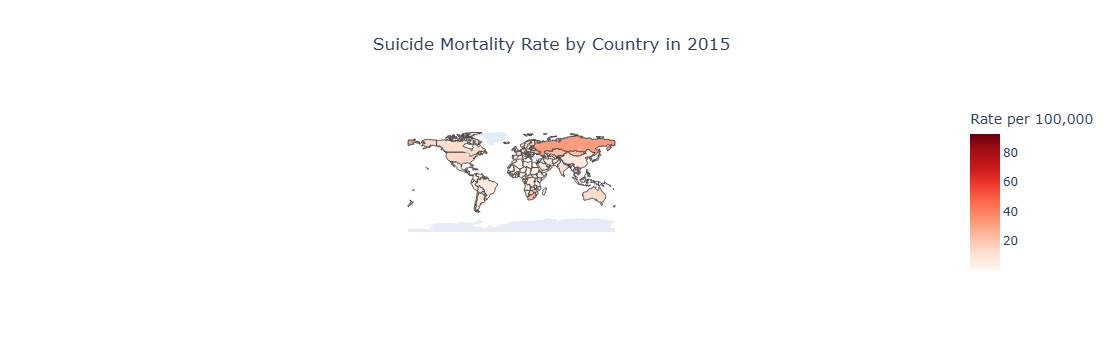

In [144]:
# Step 1: Choose a year to visualize
year = 2015

# Step 2: Filter data to that year, total age, and total gender
df_map = df[
    (df["DIM_TIME"] == year) &
    (df["DIM_SEX"] == "TOTAL") &
    (df["DIM_AGE"] == "TOTAL")
].copy()

# Step 3: Create the choropleth map
fig = px.choropleth(
    df_map,
    locations="GEO_NAME_SHORT",
    locationmode="country names",
    color="RATE_PER_100000_N",
    hover_name="GEO_NAME_SHORT",
    color_continuous_scale="Reds",
    title=f"Suicide Mortality Rate by Country in {year}",
    labels={"RATE_PER_100000_N": "Rate per 100,000"}
)

# Step 4: Clean up map appearance
fig.update_geos(showframe=False, showcoastlines=False)
fig.update_layout(title_x=0.5)

# Step 5: Show the map
fig.show()



Now I want to animate it. I  do this by adding extra

## Option 2 (Enhanced): Animated Choropleth Map Over Time
This animated map shows how suicide mortality rates have changed globally over time. Each frame represents a different year, allowing us to observe trends, regional shifts, and emerging patterns in suicide rates across countries (the years on the bottom were not right so i had to do this next cell twice to get the years in order).

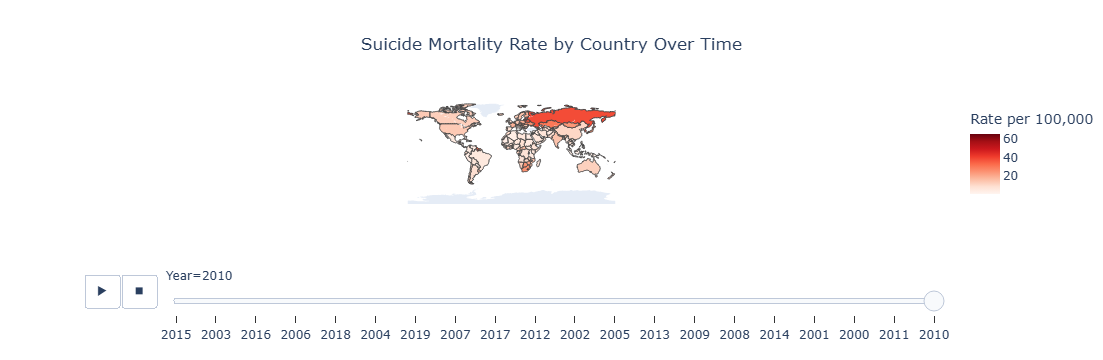

In [147]:
# Step 1: Filter to total age and total gender
df_map = df[
    (df["DIM_SEX"] == "TOTAL") &
    (df["DIM_AGE"] == "TOTAL")
].copy()

# Step 2: Create the animated choropleth
fig = px.choropleth(
    df_map,
    locations="GEO_NAME_SHORT",
    locationmode="country names",
    color="RATE_PER_100000_N",
    hover_name="GEO_NAME_SHORT",
    animation_frame="DIM_TIME",
    color_continuous_scale="Reds",
    title="Suicide Mortality Rate by Country Over Time",
    labels={
        "RATE_PER_100000_N": "Rate per 100,000",
        "DIM_TIME": "Year"
    }
)

# Step 3: Clean up map appearance
fig.update_geos(showframe=False, showcoastlines=False)
fig.update_layout(title_x=0.5)

# Step 4: Show the animated map
fig.show()


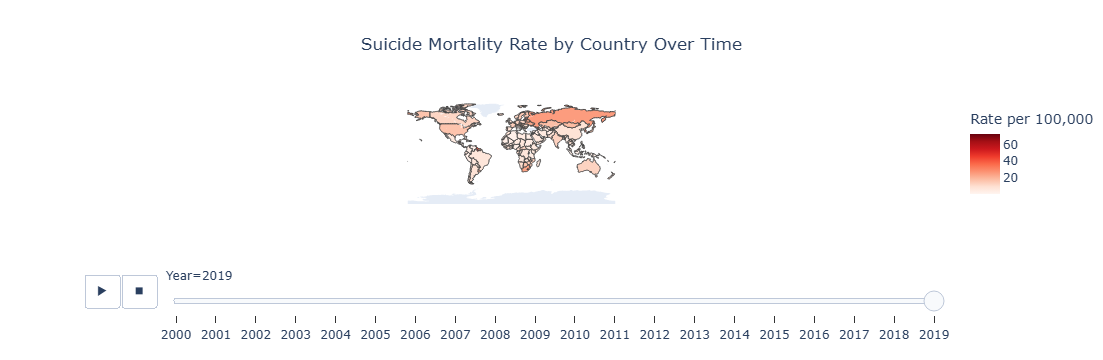

In [149]:
# Ensure year is numeric
df["DIM_TIME"] = pd.to_numeric(df["DIM_TIME"], errors="coerce")

# Filter to total age and total gender
df_map = df[
    (df["DIM_SEX"] == "TOTAL") &
    (df["DIM_AGE"] == "TOTAL")
].copy()
df_map = df_map.sort_values(by="DIM_TIME")  # 🔧 Force chronological order

# Create the animated choropleth
fig = px.choropleth(
    df_map,
    locations="GEO_NAME_SHORT",
    locationmode="country names",
    color="RATE_PER_100000_N",
    hover_name="GEO_NAME_SHORT",
    animation_frame="DIM_TIME",
    color_continuous_scale="Reds",
    title="Suicide Mortality Rate by Country Over Time",
    labels={
        "RATE_PER_100000_N": "Rate per 100,000",
        "DIM_TIME": "Year"
    }
)

# Clean up map appearance
fig.update_geos(showframe=False, showcoastlines=False)
fig.update_layout(title_x=0.5)

# Show the animated map
fig.show()


You can tell US increased and switched with India being hight right there at the end of data


So if I wanted to make this a Dashboard or an Application of some type, I would need to use a Python Script(.py) not a Jupyter Notebook. So i'll Save here and switch. 